#Personalisasi Menu Diet Vegan

In [ ]:
!pip install -q deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.6/381.6 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 3.3 MB/

In [ ]:
import pandas as pd
import numpy as np
import random
from deap import base
from deap import creator
from deap import tools

#Optimization Goal Precentage (Opsional)

In [ ]:
# Meminta pengguna memasukkan nilai kalori yang diinginkan
while True:
    calories = float(input("Masukkan jumlah kalori yang diinginkan (minimal 2500): "))

    if calories < 2500:
        print("Maaf, jumlah kalori terlalu rendah. Minimal 2500 kalori.")
    else:
        break

# Menghitung total kalori
total_calories = calories * 100 * 7
percentage_prot = 0.3
percentage_carb = 0.5
percentage_fat = 0.2

# Menghitung total kalori per makro
cal_prot = round(percentage_prot * total_calories)
cal_carb = round(percentage_carb * total_calories)
cal_fat = round(percentage_fat * total_calories)
print("Total kalori per makro: ", cal_prot, cal_carb, cal_fat)

# Informasi tetap tentang nutrisi makro: kalori per gram protein, karbohidrat, dan lemak
prot_cal_p_gram = 4
carb_cal_p_gram = 4
fat_cal_p_gram = 9

# Menghitung gram makro yang diinginkan
gram_prot = cal_prot / prot_cal_p_gram
gram_carb = cal_carb / carb_cal_p_gram
gram_fat = cal_fat / fat_cal_p_gram
print("Jumlah gram makro yang diinginkan: ", gram_prot, gram_carb, gram_fat)


Masukkan jumlah kalori yang diinginkan (minimal 2500): 2750
Total kalori per makro:  577500 962500 385000
Jumlah gram makro yang diinginkan:  144375.0 240625.0 42777.77777777778


#Data Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv('pakan.csv')

# Menampilkan isi dataset
data.sample(80)

,Makanan,Porsi,Kalori,Lemak,Karbo,Protein,Kategori,Index
43,Pepes Tahu,1,63,356,246,571,Lauk,44
7,Roti Gandum,1,67,107,1226,237,Makanan_Pokok,8
67,Anggur,1,55,13,1448,58,Buah,68
106,Oseng Brokoli,1,87,433,1142,370,Sayur,107
6,Nasi Merah,1,110,89,2278,256,Makanan_Pokok,7
...,...,...,...,...,...,...,...,...
66,Jeruk Medan,1,62,16,1539,123,Buah,67
55,Kering Kentang,1,165,860,1744,544,Lauk,56
52,Sambal Kentang,1,102,302,1015,875,Lauk,53
115,Sup Toge,1,86,192,1273,312,Sayur,116


In [ ]:
data.info

<bound method DataFrame.info of                   Makanan  Porsi  Kalori  Lemak  Karbo  Protein  \
0            Jagung Rebus      1      59   4700   1407      196   
1           Kentang Rebus      1     178    383   4127       20   
2             Ketan Putih      1     113     22   2446      234   
3                 Ketupat      1     160    242   3036      327   
4                 Lontong      1     130     20   2858      249   
..                    ...    ...     ...    ...    ...      ...   
115              Sup Toge      1      86    192   1273      312   
116           Toge Goreng      1      94    280   1422      522   
117  Tumis Jantung Pisang      1      83    312    413      337   
118     Tumis Kembang Kol      1     117    923    691      312   
119           Salad Kubis      1     134   1182    704      118   

          Kategori  Index  
0    Makanan_Pokok      1  
1    Makanan_Pokok      2  
2    Makanan_Pokok      3  
3    Makanan_Pokok      4  
4    Makanan_Pokok     

In [ ]:
data.shape

(120, 8)

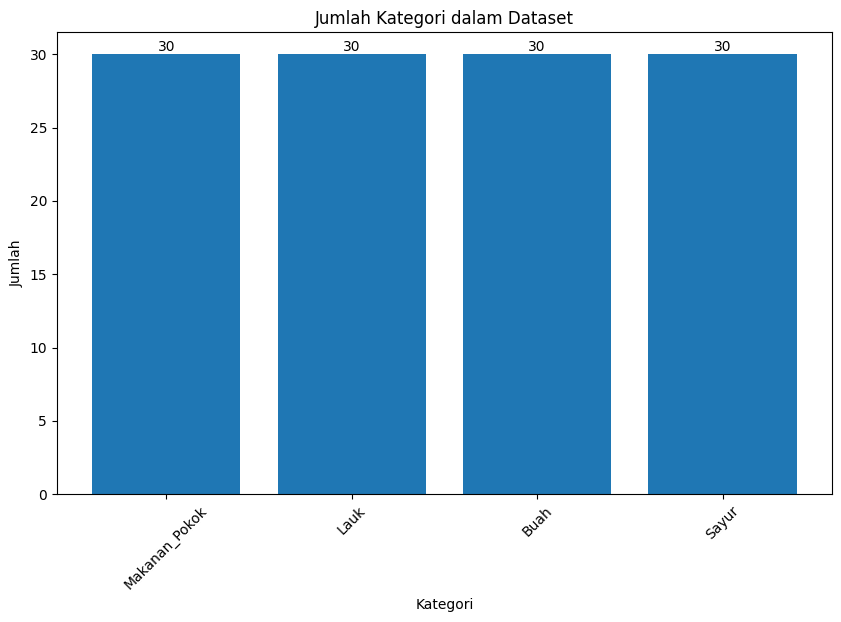

In [ ]:
kategori_count = data['Kategori'].value_counts()

# Membuat diagram batang
plt.figure(figsize=(10, 6))
bars = plt.bar(kategori_count.index, kategori_count.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Jumlah Kategori dalam Dataset')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

plt.show()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Makanan     0
Porsi       0
Kalori      0
Lemak       0
Karbo       0
Protein     0
Kategori    0
Index       0
dtype: int64

In [ ]:
# extract the information of products in a format that is easier to use in the deap algorithms cost function
cal_data = data[['Lemak', 'Karbo', 'Protein']]

prot_data = list(cal_data['Protein'])
fat_data = list(cal_data['Lemak'])
carb_data = list(cal_data['Karbo'])

In [ ]:
print(prot_data)

[196, 20, 234, 327, 249, 279, 256, 237, 149, 150, 283, 361, 200, 806, 700, 2770, 407, 350, 1773, 2756, 473, 244, 800, 939, 16, 806, 318, 150, 209, 187, 1574, 1864, 1131, 952, 144, 187, 228, 1719, 1025, 1661, 190, 485, 1381, 571, 168, 1090, 1175, 1990, 1468, 1118, 1819, 1360, 875, 489, 4603, 544, 143, 1099, 1330, 134, 40, 35, 95, 13, 60, 255, 123, 58, 85, 84, 84, 147, 63, 155, 12, 61, 78, 131, 84, 87, 402, 67, 41, 44, 58, 100, 147, 62, 88, 63, 214, 71, 318, 666, 212, 259, 276, 1734, 1653, 319, 197, 805, 987, 182, 987, 571, 370, 511, 185, 63, 794, 612, 153, 428, 382, 312, 522, 337, 312, 118]


In [ ]:
print(fat_data)

[4700, 383, 22, 242, 20, 29, 89, 107, 31, 20, 5, 129, 600, 129, 1500, 1087, 1295, 150, 1704, 1239, 857, 984, 1200, 928, 6, 129, 69, 20, 7, 6, 984, 1580, 1300, 733, 894, 540, 560, 2018, 664, 1935, 293, 27, 919, 356, 219, 470, 420, 660, 887, 1278, 1138, 1293, 302, 243, 3430, 860, 802, 441, 830, 456, 26, 16, 30, 6, 32, 95, 16, 13, 20, 45, 19, 30, 20, 44, 5, 15, 38, 10, 19, 40, 2947, 30, 58, 110, 13, 30, 533, 20, 34, 10, 44, 86, 276, 947, 193, 43, 940, 1913, 1679, 453, 345, 200, 939, 471, 933, 758, 433, 482, 52, 12, 645, 650, 432, 577, 66, 192, 280, 312, 923, 1182]


In [ ]:
print(carb_data)

[1407, 4127, 2446, 3036, 2858, 2930, 2278, 1226, 4170, 2646, 2191, 3662, 2100, 4295, 4600, 3297, 3284, 1850, 5479, 3612, 8110, 2496, 5200, 3138, 8609, 4295, 5586, 2646, 2676, 2394, 1872, 1116, 1015, 546, 1636, 945, 1239, 1049, 865, 1041, 604, 1696, 1696, 246, 413, 80, 345, 270, 749, 1269, 935, 2646, 1015, 1268, 3852, 1744, 536, 999, 855, 740, 2127, 1633, 612, 256, 1399, 1432, 1539, 1448, 1337, 2805, 1958, 2401, 2566, 3790, 607, 755, 1226, 1514, 816, 1114, 1751, 768, 1792, 1900, 1440, 1684, 2700, 1988, 1454, 808, 917, 367, 1290, 1470, 1140, 966, 431, 5262, 2567, 722, 815, 1201, 1062, 2254, 1026, 1158, 1142, 1120, 557, 277, 323, 341, 672, 892, 927, 1273, 1422, 413, 691, 704]


In [ ]:
import random

# Fungsi untuk memilih indeks unik dari setiap kategori
def choose_unique_indices_per_category(dataset, category_list):
    chosen_indices = []
    for category in category_list:
        food_category = dataset[dataset['Kategori'] == category]
        if len(food_category) > 0:
            available_indices = [idx for idx in food_category['Index'].tolist() if idx not in chosen_indices]
            if available_indices:
                chosen_index = random.choice(available_indices)
                chosen_indices.append(chosen_index)
            else:
                print(f"Semua indeks untuk kategori '{category}' telah dipilih.")
                return None
        else:
            print(f"Tidak ada entri untuk kategori '{category}' dalam dataset.")
            return None
    return chosen_indices

# Fungsi untuk membuat urutan yang diinginkan
def generate_chromosome(data):
    categories = ['Makanan_Pokok', 'Buah', 'Sayur', 'Lauk']
    chosen_indices = choose_unique_indices_per_category(data, categories * 3)

    return chosen_indices

# Memanggil fungsi generate_chromosome dengan dataset Anda
chromosome = generate_chromosome(data)
print(chromosome)


[26, 76, 112, 40, 20, 70, 96, 48, 30, 88, 113, 55]


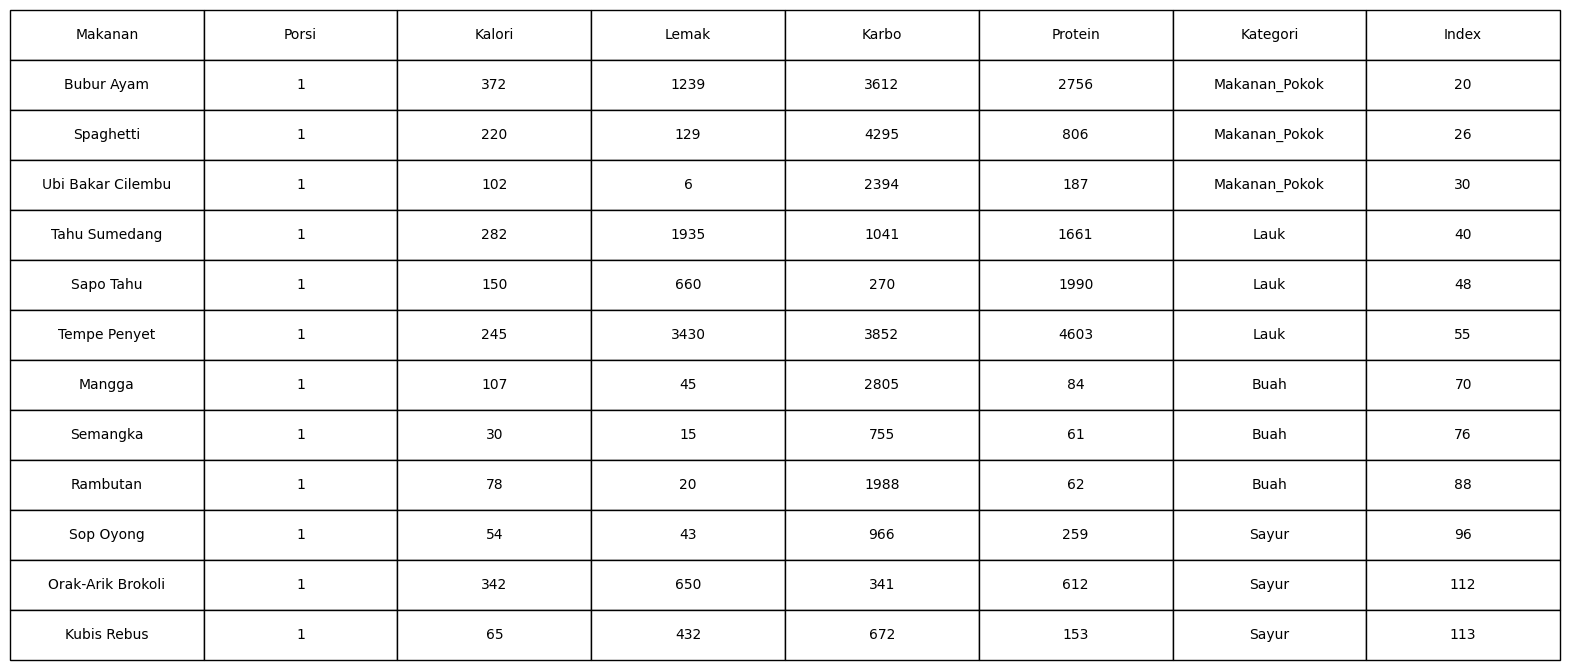

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan data dalam bentuk tabel menggunakan Matplotlib
def show_data_table_by_indices_matplotlib(data, indices):
    selected_data = data[data['Index'].isin(indices)]

    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111, frame_on=False)  # Membuat frame kosong
    ax.xaxis.set_visible(False)  # Sembunyikan sumbu x
    ax.yaxis.set_visible(False)  # Sembunyikan sumbu y

    table = ax.table(cellText=selected_data.values, colLabels=selected_data.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2, 3)  # Skala tabel

    plt.show()

# Menampilkan data dari dataset berdasarkan indeks yang dihasilkan dalam bentuk tabel dengan Matplotlib
show_data_table_by_indices_matplotlib(data, chromosome)


In [ ]:
def evaluate(individual):
    # Memastikan individual adalah list dengan nilai numerik
    individual_values = []
    for gene in individual:
        if isinstance(gene, list):
            # Jika gene merupakan list, tambahkan nilai pertama dari list tersebut + 1
            individual_values.append(gene[0] - 1)
        else:
            # Jika bukan list, langsung tambahkan nilai gene + 1 ke dalam individual_values
            individual_values.append(gene - 1)

    # Perbaikan bagian ini untuk menghindari indeks yang melebihi panjang list data
    prot_data_terpilih = [prot_data[i] for i in individual_values]
    fat_data_terpilih = [fat_data[i] for i in individual_values]
    carb_data_terpilih = [carb_data[i] for i in individual_values]

    # Menghitung total berdasarkan data yang terpilih
    tot_prot = sum(prot_data_terpilih)
    tot_fat = sum(fat_data_terpilih)
    tot_carb = sum(carb_data_terpilih)

    # Perhitungan kalori
    cals = prot_cal_p_gram * tot_prot + carb_cal_p_gram * tot_carb + fat_cal_p_gram * tot_fat

    return abs(cals - total_calories),


In [ ]:
# this is the setup of the deap library: registering the different function into the toolbox
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("n_per_product", generate_chromosome, data)

toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.n_per_product, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selNSGA2)


In [ ]:
toolbox.population(n=2)

[[[1, 86, 98, 59, 21, 76, 102, 51, 16, 85, 116, 50]],
 [[15, 69, 106, 43, 1, 74, 115, 32, 18, 90, 108, 33]]]

#**RULES**

In [ ]:
def remove_duplicates(population):
    # Create a set to store unique fitness values and their corresponding individuals
    unique_fitness = {}
    for ind in population:
        fit_val = ind.fitness.values[0]
        if fit_val not in unique_fitness:
            unique_fitness[fit_val] = ind
        else:
            # If a duplicate fitness value is found, replace it with a random individual
            if random.random() < 0.5:  # Adjust the probability as needed
                unique_fitness[fit_val] = ind

    # Return a list of unique individuals
    return list(unique_fitness.values())

In [ ]:
import random

def get_random_category(categories, chosen_category):
    if chosen_category == 'Makanan_Pokok':
        return random.randint(0, 30)
    elif chosen_category == 'Lauk':
        return random.randint(31, 60)
    elif chosen_category == 'Buah':
        return random.randint(61, 90)
    elif chosen_category == 'Sayur':
        return random.randint(91, 120)

def check_categories(individual):
    categories = {
        'Makanan_Pokok': False,
        'Buah': False,
        'Sayur': False,
        'Lauk': False
    }

    for i in range(0, len(individual), 4):
        group = individual[i:i+4]

        used_categories = set()
        for num in group:
            if 0 <= num <= 30:
                used_categories.add('Makanan_Pokok')
            elif 31 <= num <= 60:
                used_categories.add('Lauk')
            elif 61 <= num <= 90:
                used_categories.add('Buah')
            elif 91 <= num <= 120:
                used_categories.add('Sayur')

        missing_categories = [category for category in categories if category not in used_categories]
        if missing_categories:
            for j, num in enumerate(group):
                category = None
                if 0 <= num <= 30:
                    category = 'Makanan_Pokok'
                elif 31 <= num <= 60:
                    category = 'Lauk'
                elif 61 <= num <= 90:
                    category = 'Buah'
                elif 91 <= num <= 120:
                    category = 'Sayur'

                if len(used_categories) == 3 and category in missing_categories:
                    for k, num in enumerate(group):
                        if not missing_categories:
                            break
                        # Ganti angka yang tidak sesuai dengan kategori
                        if num not in [get_random_category(categories, cat) for cat in missing_categories]:
                            group[k] = get_random_category(categories, category)
                            missing_categories.remove(category)

        # Ensure there are no duplicates of the same category within a group
        categories_count = {cat: group.count(get_random_category(categories, cat)) for cat in categories}
        while any(count > 1 for count in categories_count.values()):
            for cat, count in categories_count.items():
                if count > 1:
                    indices = [idx for idx, num in enumerate(group) if get_random_category(categories, cat) == num]
                    for idx in indices[1:]:
                        for new_cat in categories:
                            if new_cat != cat and get_random_category(categories, new_cat) not in group:
                                group[idx] = get_random_category(categories, new_cat)
                                break
                    categories_count[cat] -= 1



        # Replace the modified group back into the individual
        individual[i:i+4] = group

    return individual


#Percobaan Kerangka Kerja untuk GA

In [ ]:
def main():
    pop = toolbox.population(n=300)

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    # CXPB  is the probability with which two individuals
    #are crossed
    #
    # MUTPB is the probability for mutating an individual
    CXPB, MUTPB = 0.6, 0.01

    # Variable keeping track of the number of generations
    g = 0

    # Begin the evolution
    while g < 500:
        # A new generation
        g = g + 1
        #print("-- Generation %i --" % g)

        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        for ind in offspring:
          ind[0] = check_categories(ind[0])

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1[0], child2[0])
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant[0])
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        pop[:] = offspring

        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]

        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        #print(min(fits), max(fits), mean, std)

    best = pop[np.argmin([toolbox.evaluate(x) for x in pop])]

    # Remove duplicates from the population
    pop = remove_duplicates(pop)

    return best

In [ ]:
best_solution1 = main()

In [ ]:
print(best_solution1)

[[1, 80, 108, 39, 8, 82, 101, 41, 13, 87, 99, 48]]


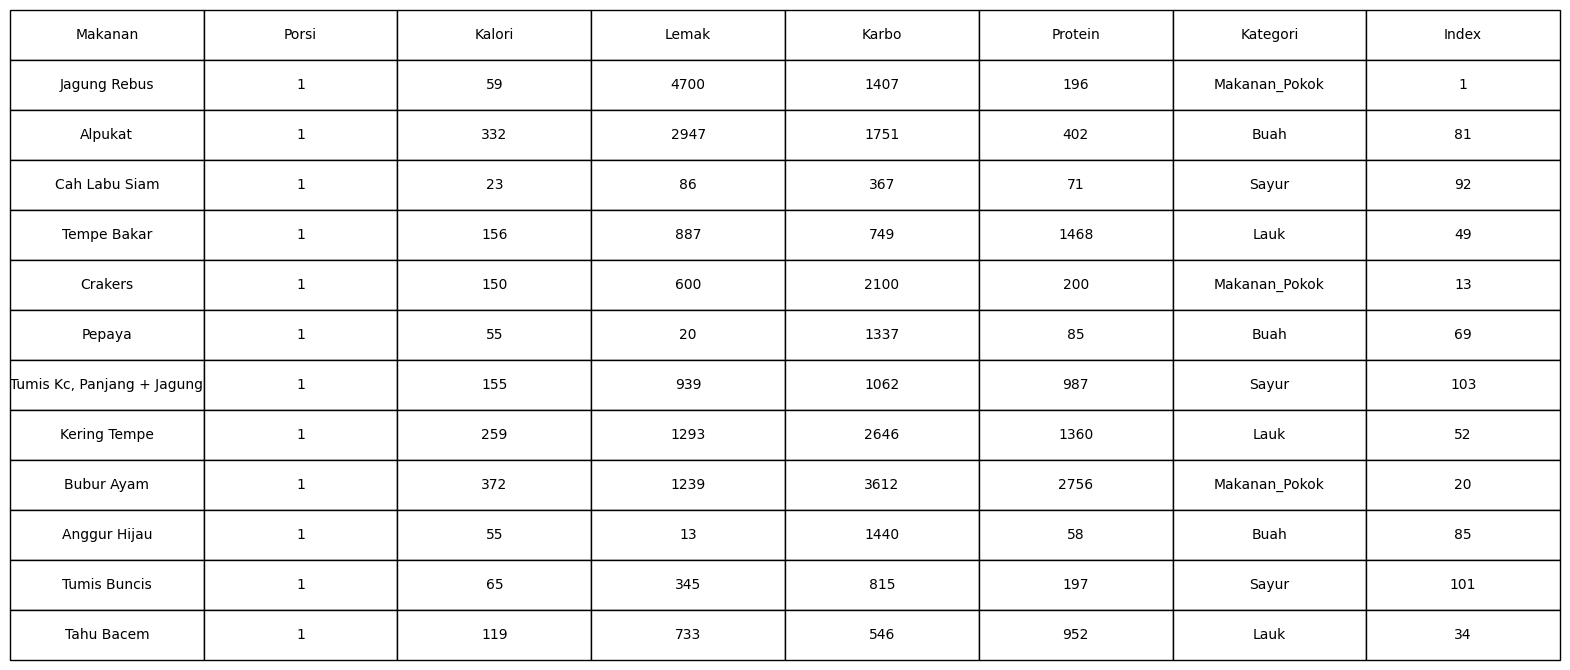

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan data dalam bentuk tabel menggunakan Matplotlib
def show_data_table_by_indices_matplotlib(data, indices):
    selected_data = data.iloc[indices]  # Menggunakan iloc untuk mendapatkan baris berdasarkan indeks

    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111, frame_on=False)  # Membuat frame kosong
    ax.xaxis.set_visible(False)  # Sembunyikan sumbu x
    ax.yaxis.set_visible(False)  # Sembunyikan sumbu y

    table = ax.table(cellText=selected_data.values, colLabels=selected_data.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2, 3)  # Skala tabel

    plt.show()

# Mendefinisikan data dan best_solution yang diberikan
data = data  # Ganti 'your_data' dengan dataset yang dimiliki
best_solution = best_solution1[0]

best_solution_adjusted = [index - 1 for index in best_solution]

# Menampilkan data dari dataset berdasarkan nilai best_solution dalam bentuk tabel dengan Matplotlib
show_data_table_by_indices_matplotlib(data, best_solution_adjusted)


In [ ]:
best_solution2 = main()

In [ ]:
print(best_solution2)

[[1, 76, 106, 56, 8, 61, 102, 37, 3, 66, 94, 39]]


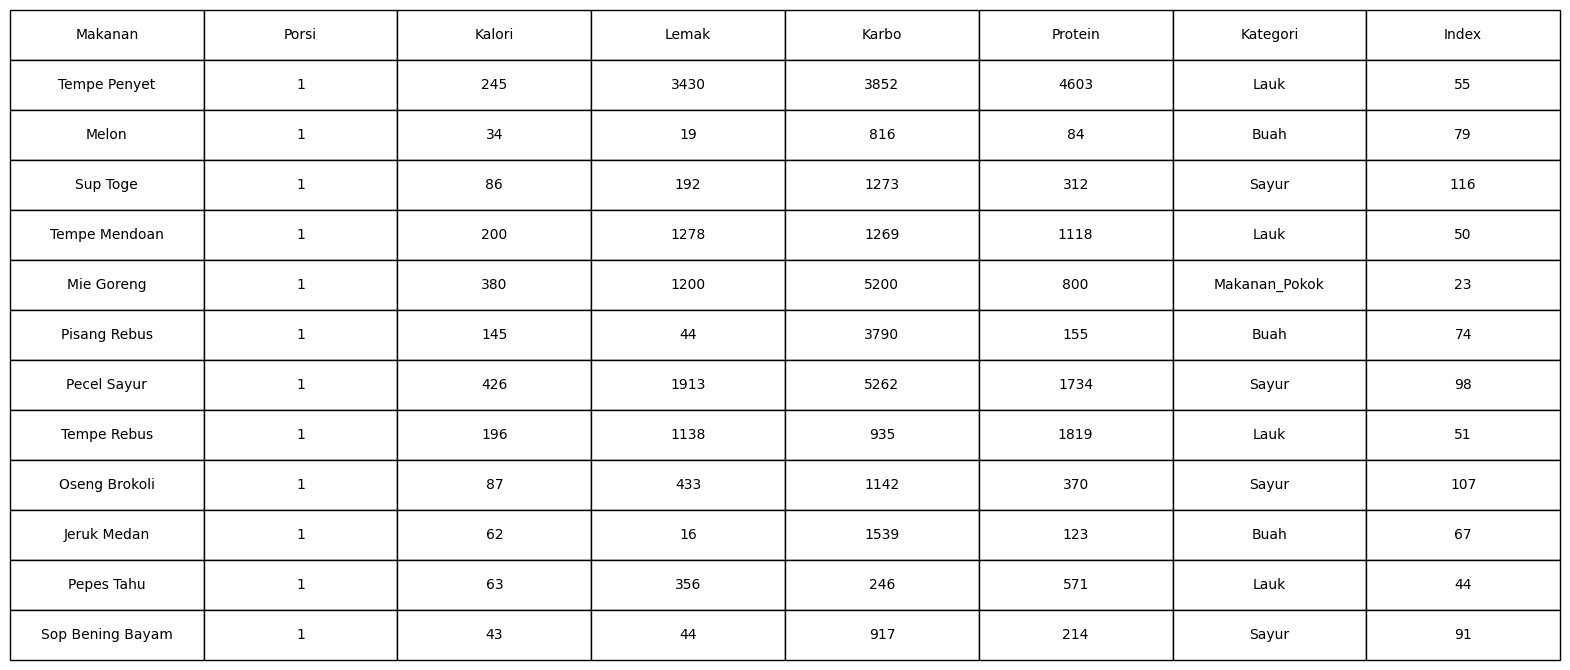

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan data dalam bentuk tabel menggunakan Matplotlib
def show_data_table_by_indices_matplotlib(data, indices):
    selected_data = data.iloc[indices]  # Menggunakan iloc untuk mendapatkan baris berdasarkan indeks

    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111, frame_on=False)  # Membuat frame kosong
    ax.xaxis.set_visible(False)  # Sembunyikan sumbu x
    ax.yaxis.set_visible(False)  # Sembunyikan sumbu y

    table = ax.table(cellText=selected_data.values, colLabels=selected_data.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2, 3)  # Skala tabel

    plt.show()

# Mendefinisikan data dan best_solution yang diberikan
data = data  # Ganti 'your_data' dengan dataset yang dimiliki
best_solution = best_solution2[0]

best_solution_adjusted = [index - 1 for index in best_solution]

# Menampilkan data dari dataset berdasarkan nilai best_solution dalam bentuk tabel dengan Matplotlib
show_data_table_by_indices_matplotlib(data, best_solution_adjusted)


#**Interface**

In [89]:
import gradio as gr

def optimize_nutrition(calories):
    total_calories = calories * 100 * 7
    percentage_prot = 0.3
    percentage_carb = 0.5
    percentage_fat = 0.2

    cal_prot = round(percentage_prot * total_calories)
    cal_carb = round(percentage_carb * total_calories)
    cal_fat = round(percentage_fat * total_calories)

    prot_cal_p_gram = 4
    carb_cal_p_gram = 4
    fat_cal_p_gram = 9

    gram_prot = cal_prot / prot_cal_p_gram
    gram_carb = cal_carb / carb_cal_p_gram
    gram_fat = cal_fat / fat_cal_p_gram

    return gram_prot, gram_carb, gram_fat

def interface(calories):
    gram_prot, gram_carb, gram_fat = optimize_nutrition(float(calories))
    result = f"For {calories} calories: Protein - {gram_prot}g, Carbs - {gram_carb}g, Fat - {gram_fat}g"
    return result

iface = gr.Interface(
    fn=interface,
    inputs="text",
    outputs="text",
    title="Nutrition Optimization",
    description="Enter the number of calories you want to optimize for:"
)

iface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7fa67e0f7b50de8b12.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5df0fea8f92ceb61ac.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://7fa67e0f7b50de8b12.gradio.live


In [90]:
import time
start_time = time.time()
best_solution1 = main()
finish_time = time.time()
elapsed_time = finish_time - start_time

In [91]:
start_time = time.time()
best_solution2 = main()
finish_time = time.time()
elapsed_time2 = finish_time - start_time
print(f"Waktu eksekusi: {elapsed_time + elapsed_time2} detik")

In [ ]:
import pandas as pd

# Membaca dataset
data = pd.read_csv('pakan.csv')

# Fungsi untuk memanggil makanan berdasarkan indeks dalam list
def panggil_makanan(indeks):
    makanan_ditemukan = []
    for index in indeks:
        if index < len(data):
            makanan_ditemukan.append(data.loc[index, 'Makanan'])
        else:
            makanan_ditemukan.append("Index di luar rentang dataset")
    return makanan_ditemukan

print("MENU 1")

data = data  # Ganti 'your_data' dengan dataset yang dimiliki
best_solution = best_solution2[0]
makanan_yang_dicari = panggil_makanan([x - 1 for x in best_solution])

# Menampilkan makanan untuk pagi dari empat data pertama
for i in range(4):
    print("Makan Pagi:", makanan_yang_dicari[i])

# Menampilkan makanan untuk siang empat data kedua
for i in range(4, 8):
    print("Makan Siang:", makanan_yang_dicari[i])

# Menampilkan makanan untuk sore empat data ketiga
for i in range(8, 12):
    print("Makan Sore:", makanan_yang_dicari[i])

print("MENU 2")

data = data  # Ganti 'your_data' dengan dataset yang dimiliki
best_solution = best_solution1[0]
makanan_yang_dicari = panggil_makanan([x - 1 for x in best_solution])

# Menampilkan makanan untuk pagi dari empat data pertama
for i in range(4):
    print("Makan Pagi:", makanan_yang_dicari[i])

# Menampilkan makanan untuk siang empat data kedua
for i in range(4, 8):
    print("Makan Siang:", makanan_yang_dicari[i])

# Menampilkan makanan untuk sore empat data ketiga
for i in range(8, 12):
    print("Makan Sore:", makanan_yang_dicari[i])

